<a href="https://colab.research.google.com/github/SaidFayache/TP4-DataMining/blob/main/TP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP4 Data Mining

### Réalisé par : **Feydi** Achraf & **Fayache** Mohamed Said - GL4

## Partie 1: Données de travail

In [127]:
import pandas as pd
fromage=pd.read_table(r"fromage.txt",sep="\t",header=0,index_col=0)
print(fromage.describe())

         calories      sodium     calcium  ...  proteines  cholesterol  magnesium
count   29.000000   29.000000   29.000000  ...  29.000000    29.000000  29.000000
mean   300.034483  210.086207  185.734483  ...  20.168966    74.586207  26.965517
std     91.914356  108.678923   72.528882  ...   6.959788    28.245755  11.318388
min     70.000000   22.000000   72.600000  ...   4.100000    10.000000  10.000000
25%    292.000000  140.000000  132.900000  ...  17.800000    70.000000  20.000000
50%    321.000000  223.000000  202.300000  ...  21.000000    80.000000  26.000000
75%    355.000000  276.000000  220.500000  ...  23.400000    90.000000  30.000000
max    406.000000  432.000000  334.600000  ...  35.700000   120.000000  51.000000

[8 rows x 9 columns]


Notre jeu de données contient 29 types de fromage, chacun d'eux est caractérisé par 9 attributs ( calories, sodium ... )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0996e5a350>,
      dtype=object)

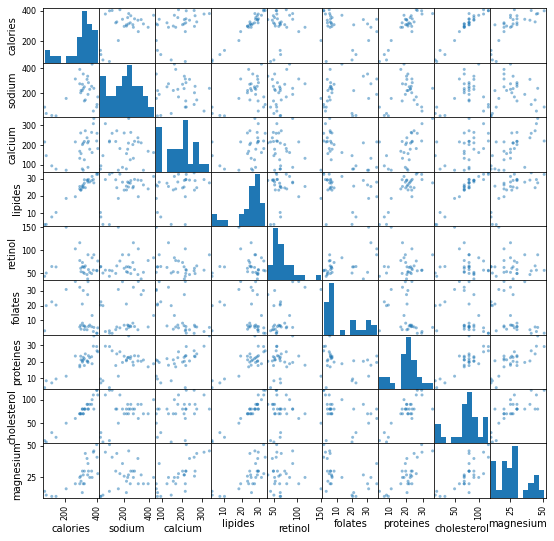

In [128]:
pd.plotting.scatter_matrix(fromage, figsize=(9,9))

On remarque que l'attribut cholesterol croisé avec tout autre attribut donne une meilleure classification.

## Partie 2: Méthode des centres mobiles

In [129]:
import numpy as np
from sklearn import cluster
np.random.seed(0)
kmeans = cluster.KMeans(n_clusters = 4)
kmeans.fit(fromage)
idk = np.argsort(kmeans.labels_)
print(pd.DataFrame(fromage.index[idk],kmeans.labels_[idk]))
print(kmeans.transform(fromage))

             Fromages
0            Parmesan
0            Beaufort
0         SaintPaulin
0            Vacherin
0            Emmental
0             Cheddar
0               Comte
0                Edam
1         Coulomniers
1            Pyrenees
1  Fr.chevrepatemolle
1         PontlEveque
1            Chaource
1           Chabichou
1                Tome
1             Babybel
2      Fr.frais20nat.
2      Fr.frais40nat.
2       Petitsuisse40
2  Yaourtlaitent.nat.
3          Rocquefort
3           Reblochon
3         CarredelEst
3           Maroilles
3              Cantal
3           Camembert
3                Bleu
3             Morbier
3         Fr.fondu.45
[[285.36163076 145.45179721 384.27301005 127.66904456]
 [118.43379084  84.03758274 303.10311983  93.02921551]
 [ 56.72603293 205.07356073 349.91323389 241.39308525]
 [200.30401971 150.63556291 393.76898843  39.24299576]
 [210.31138298 134.45026148 332.43471728  84.3287841 ]
 [111.73150994 155.73016828 371.97076666 109.43789941]
 [182.8059

On a divisé les fromages en 4 clusters, ayant chacun comme classe 0,1,2 ou 3

In [130]:
print(kmeans.cluster_centers_)

[[363.875      146.125      257.025       29.05        63.6
    3.8625      26.5625      96.25        38.875     ]
 [305.         224.375      130.375       25.15        81.3875
   18.0375      19.6         73.75        23.        ]
 [101.75        44.75       133.75         6.275       55.15
   16.475        7.2         18.25        11.25      ]
 [327.         327.72222222 194.67777778  26.87777778  64.31111111
   15.13333333  20.75555556  81.11111111  26.88888889]]


C'est l'ensemeble des centres des 4 clusters, chacun contient le centre pour chaque attribut, shape (4,9) : 4 -> nb clusters ; 9 -> nb attributs

## Aide à la détection du nombre adéquat de groupes

In [131]:
from sklearn import metrics
#utilisation de la métrique "silhouette"
res = np.arange(9,dtype ="double")
for k in np.arange(9):
  km = cluster.KMeans(n_clusters =k+2)
  km.fit(fromage)
  res[k] = metrics.silhouette_score(fromage,km.labels_)
print (res)

[0.50681355 0.37299771 0.3369907  0.35737616 0.32609984 0.2888388
 0.29480635 0.2872981  0.24638892]


<function matplotlib.pyplot.show>

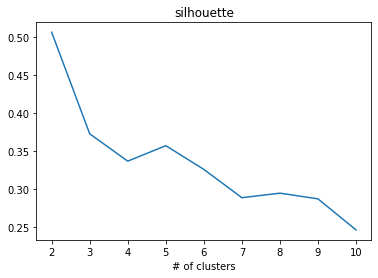

In [132]:
#graphique
import matplotlib.pyplot as plt
plt.title("silhouette")
plt.xlabel("# of clusters")
plt.plot(np.arange(2,11,1),(res))
plt.show

Selon la metrique silhouette, la meilleure valeur de est 2, donc d'apres cette metrique, la meilleur solution de classification est faite en divisant nos données en 2 groupes (2 clusters) distincts

## Partie 3: Classification ascendante hiérarchique

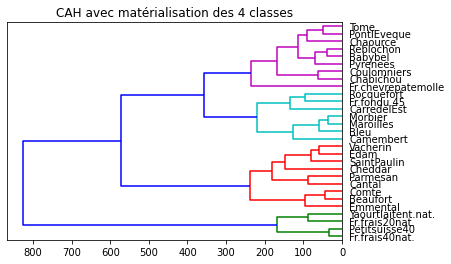

[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]
             Fromages
1  Yaourtlaitent.nat.
1       Petitsuisse40
1      Fr.frais40nat.
1      Fr.frais20nat.
2         SaintPaulin
2            Beaufort
2              Cantal
2            Parmesan
2             Cheddar
2               Comte
2                Edam
2            Emmental
2            Vacherin
3          Rocquefort
3             Morbier
3           Maroilles
3         CarredelEst
3           Camembert
3                Bleu
3         Fr.fondu.45
4         Coulomniers
4            Chaource
4           Chabichou
4         PontlEveque
4            Pyrenees
4           Reblochon
4             Babybel
4                Tome
4  Fr.chevrepatemolle


In [133]:
import pandas
import numpy as np
#librairies pour la CAH
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(fromage,method='ward', metric='euclidean')
#affichage du dendrogramme
plt.title("CAH")
plt.title('CAH avec matérialisation des 4 classes')
dendrogram(Z,labels=fromage.index,orientation='left',color_threshold=255)
plt.show()
groupes_cah = fcluster(Z, t = 255,criterion='distance')
print(groupes_cah)
#index triés des groupes
idg = np.argsort(groupes_cah)
#affichage des observations et leurs groupes
print(pandas.DataFrame(fromage.index[idg],groupes_cah[idg]))

On remarque que cet algorithme a divisé les fromages en 4 classes (groupes), donc on voit que ce dataset est optimalement divisible sur 4 groupes selon cet algorithme.

In [134]:
print(kmeans.labels_)
print(groupes_cah)
pandas.crosstab(groupes_cah, kmeans.labels_)

[3 1 0 3 3 3 1 1 0 0 1 0 0 1 3 2 2 3 3 0 2 1 1 3 3 0 1 0 2]
[3 4 2 3 3 2 4 4 2 2 4 2 2 4 3 1 1 3 3 2 1 4 4 4 3 2 4 2 1]


col_0,0,1,2,3
row_0,,,,
1,0,0,4,0
2,8,0,0,1
3,0,0,0,7
4,0,8,0,1


On voit que a peu pres : 

la classe 0 pour cah => correspond a la classe 2 de kmeans

la classe 1 pour cah => correspond a la classe 4 de kmeans

la classe 2 pour cah => correspond a la classe 1 de kmeans

la classe 3 pour cah => correspond a la classe 3 de kmeans


## Partie 3: Interprétation des classes

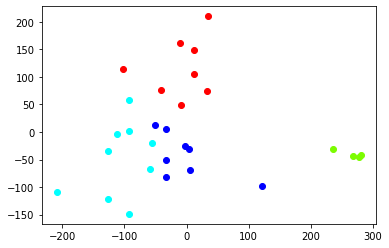

In [135]:
from sklearn.decomposition import PCA
acp= PCA(n_components =2).fit_transform(fromage)
for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
  plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur)
plt.show()


En résumant l'information de nos données sur 2 coposants pricipaux, on a pu les afficher sur un plan cartésien, et on affiche ensuite chaque donnée selon sa classification faite par kmeans, on voit qu'en réduisant l'information de nos données sur 2 composants ( au lieu de 9 initialement ), on préserve le fait que chaque donnée appartient a un cluster, donc nos données restent a peu pres classifiés meme en réduisant l'information. 

## Compte rendu
2-

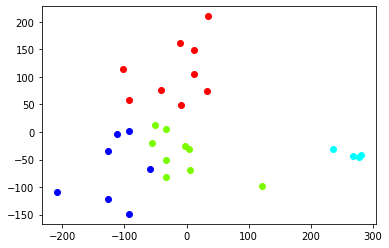

In [136]:
 from sklearn.cluster import AgglomerativeClustering
 agc = AgglomerativeClustering(n_clusters=4).fit(fromage)
 for couleur,k in zip(['red','blue','lawngreen', 'aqua'],[0,1,2,3]):
  plt.scatter(acp[agc.labels_==k,0],acp[agc.labels_==k,1],c=couleur)
plt.show()

On voit que a peu pres il y'a eu la meme classification par la methode AgglomerativeClustering et K-Means , seulement quelques point different,
On voit aussi que la classe 3 de agc ( correspondant a la classe 2 de kmeans) reste exactement la meme alors que les autres classes different de +-1/2 pts

2-

In [137]:
def divide(data):
    # effectuer k-means sur notre data avec nb_clusters = 2.
    kmeans_model = cluster.KMeans(n_clusters=2)
    kmeans_model.fit(data)
    obtained_labels = kmeans_model.labels_
    
    # diviser notre data en deux parties en utilisant les labels obtenus.
    data_left_child, data_right_child = data[obtained_labels==0], \
                                                      data[obtained_labels==1]
    
    return (data_left_child, data_right_child)

In [139]:
import queue
clusters_queue = queue.Queue()
clusters_queue.put(fromage);
# we divide into 4 clusters
for i in range(2):
  for j in range(i+1):
    data = clusters_queue.get();
    left_child,right_child = divide(data)
    clusters_queue.put(left_child)
    clusters_queue.put(right_child)

num = 1;
# print generated clusters
while not clusters_queue.empty():
  clusterx = clusters_queue.get()
  print(pandas.DataFrame(clusterx.index.to_list(),np.ones(clusterx.index.size)*num),"\n")
  num = num + 1


               0
1.0     Beaufort
1.0       Cantal
1.0      Cheddar
1.0        Comte
1.0         Edam
1.0     Emmental
1.0     Parmesan
1.0  SaintPaulin
1.0     Vacherin 

               0
2.0  CarredelEst
2.0      Babybel
2.0         Bleu
2.0    Camembert
2.0    Chabichou
2.0     Chaource
2.0  Coulomniers
2.0  Fr.fondu.45
2.0    Maroilles
2.0      Morbier
2.0  PontlEveque
2.0     Pyrenees
2.0    Reblochon
2.0   Rocquefort
2.0         Tome 

                      0
3.0      Fr.frais20nat.
3.0      Fr.frais40nat.
3.0       Petitsuisse40
3.0  Yaourtlaitent.nat. 

                      0
4.0  Fr.chevrepatemolle 



On a divisé notre dataset en 4 clusters, en suivant l'algorithme du divisive clustering basé sur l'utilisation des k-means, on a pas obtenu le meme résultat que pour la méthode ascendante, la classification differe selon l'algorithme choisi